# Market Segmentation Cluster Analysis

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the Data

In [2]:
# Load the data that contains customer satisfaction and loyalty columns
data = pd.read_csv ('marketing.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot the Data

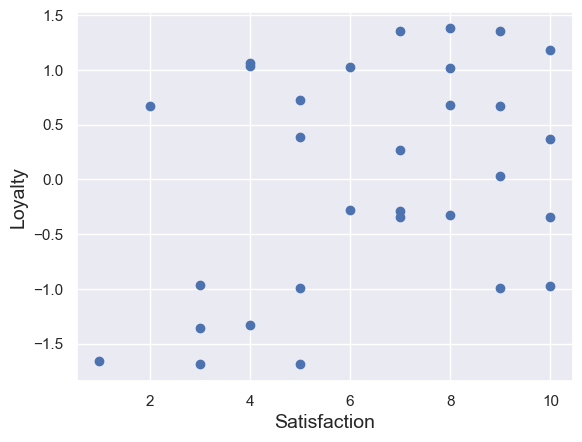

In [3]:
# Create a scatter plot of the two variables
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Loyalty', fontsize=14)
plt.show()

## Select the Features

In [4]:
# Create a copy of the data variable
x = data.copy()

## Clustering

In [5]:
# Create an object with two clusters and fit the data
kmeans = KMeans(2)
kmeans.fit(x)

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

## Clustering Results

In [6]:
# Create a copy of the input data
clusters = x.copy()
clusters['Cluster'] = kmeans.fit_predict(x)

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


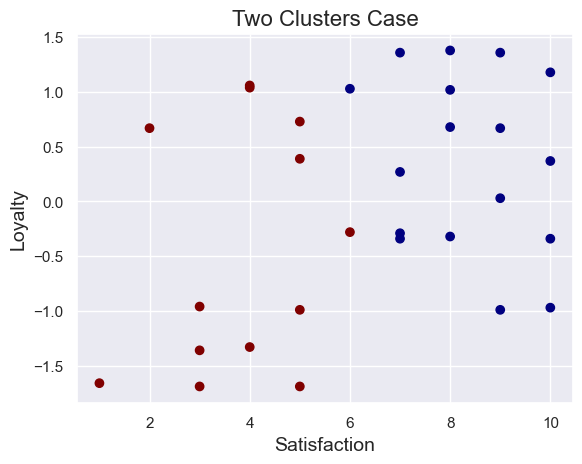

In [7]:
# Plot the data and add c argument that is taking cluster column to color the data
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['Cluster'], cmap='jet')
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Loyalty', fontsize=14)
plt.title('Two Clusters Case', fontsize=16)
plt.show()

## Standardize the Variables

In [8]:
# Scale the inputs
from sklearn.preprocessing import scale

scaled_x = scale(x)
scaled_x

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## The Elbow Method

In [9]:
# Create all possible cluster solutions with a loop
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_x)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[60.0,
 29.818973034723147,
 17.913349527387968,
 10.247181805928422,
 7.792695153937185,
 6.569489487091783,
 5.326631124753926,
 4.337110750237059,
 3.850009024978706]

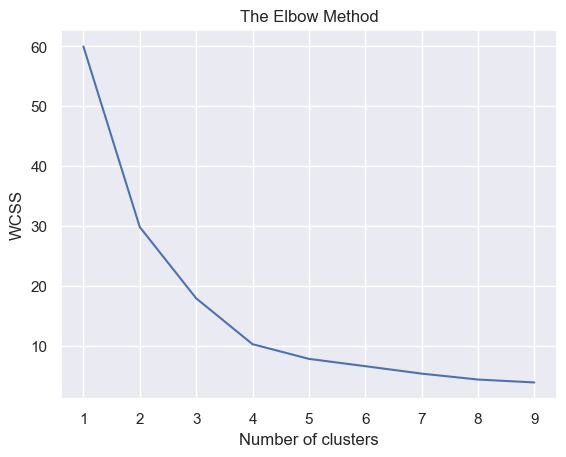

In [10]:
# Plot the number of clusters vs WCSS
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

## Explore Clustering Solutions and Select the Number of Clusters

In [11]:
# Fiddle with the number of clusters
kmeans_new = KMeans(4)
kmeans_new.fit(scaled_x)

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['Cluster'] = kmeans_new.fit_predict(scaled_x)
clusters_new.head()

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,Cluster
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,3


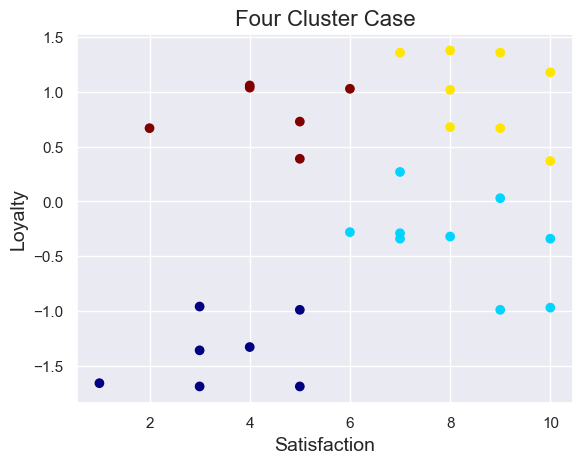

In [13]:
# Plot clusters_new dataframe
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], 
            c=clusters_new['Cluster'], cmap='jet')
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Loyalty', fontsize=14)
plt.title('Four Cluster Case', fontsize=16)
plt.show()

Data is separated into four groups:
- customers with low satisfaction and no loyalty - Disengaged
- customers with low satisfaction but high loyalty - Reluctant
- customers with high satisfaction but low loyalty - Uncommitted
- customers with high satisfaction and high loyalty - Fans

Based on the Elbow mehtod more clusters can be used but with four clusters makes more sense.

## Heatmap and dendrograms

In [14]:
x_scaled = scale(data)
x_scaled = pd.DataFrame(x_scaled, columns=['Satisfaction', 'Loyalty'])
x_scaled.head()

,Satisfaction,Loyalty
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645


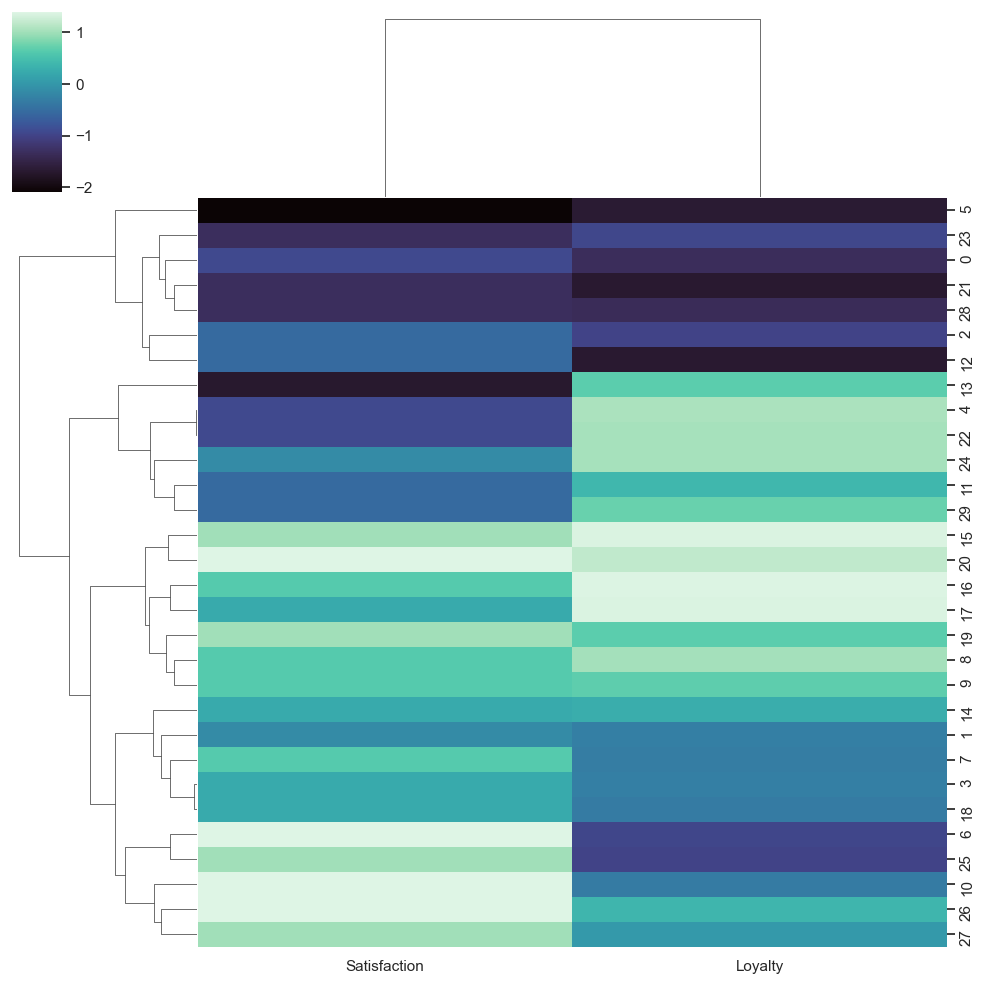

In [15]:
sns.clustermap(x_scaled, cmap='mako')

Based on the color scale darker colors represent lower values and lighter colors represent higher values.
The columns represent features `Satisfaction` and `Loyalty` and the rows are observations.

The dendrogram on the left shows hierarchical relationships among the observations (rows), while the one on the top shows relationships among the features (columns).

Darker colors indicate low satisfaction and lighter colors indicate high satisfaction and the same applies for loyalty.

Four clusters can be identified from the top to bottom of the heatmap:
- low satisfaction and low loyalty - Disengaged
- low satisfaction and high loyalty - Reluctant
- high satisfaction and high loyalty - Fans
- high satisfaction and low loyalty - Uncommitted

This result is similar to previous one obtained with k-Means clustering.